# Scikit-learn and Regression
### Workshop 2
*Jun 28 - IACS-MACI Internship*

Scikit-learn (or sklearn) is an open source library for Machine Learning. 

It provides high-level classes containing models, optimization algorithms, preprocessing tools, among others.

Along this serials of workshops we are going to use **Sklearn** in almost every aplication!

Of course you can also code your own algorithms, but it is time consuming and scikitlearn already did the work for you!

Sklearn provides functions and classes for every step in the machine learning workflow.

<img src="images/sklearn.png" width="500"/>

## Feature Preprocessing

All the modules for scaling, normalizing, and formating data can be found in [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html?highlight=preprocessing#module-sklearn.preprocessing)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #isotropic Gaussian blobs.

In [2]:
X, y = make_blobs(n_samples=100, centers=1, 
                  n_features=2, 
                  random_state=0)

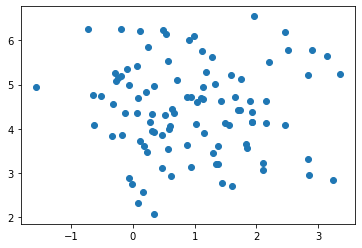

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [4]:
from sklearn.preprocessing import StandardScaler

$\hat{X} = \frac{X - \bar{X}}{\sigma_X}$

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(X)

StandardScaler()

In [7]:
X_normed = scaler.transform(X)

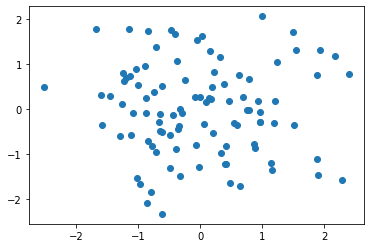

In [8]:
plt.scatter(X_normed[:, 0], X_normed[:, 1])

## k-NN
Scikitlearn implements the k-nearest neighbors in its [neighbors module](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor).

By default `metric='minkowski'` that is equivalent to the euclidian distance. However we can use [alternatives metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric).

In [9]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

First of all, let's create some data

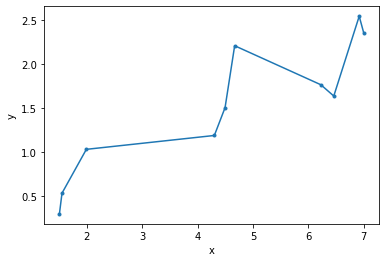

In [10]:
x = np.sort(np.random.uniform(1, 10, size=[10]))
c = 0.3

y_real = x*c 
y = y_real + np.random.normal(loc=0.0, scale=.3, size=len(x))

fig, ax = plt.subplots()
ax.plot(x, y, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [11]:
model = KNeighborsRegressor(n_neighbors=2)

In [12]:
model.fit(x[:, None], y)

KNeighborsRegressor(n_neighbors=2)

In [13]:
x.shape, x[:, None].shape

((10,), (10, 1))

We need to use matrix format in `KNeighborsRegressor`, that's why we add a new axis `[:, None]`.

Now we already have our model fitted so we can predict

In [14]:
x_test = np.sort(np.random.uniform(1, 10, size=[5]))
y_pred_knn = model.predict(x_test[:, None])

In [15]:
ax.plot(x_test, y_pred_knn, marker='.', label='knn_pred')
ax.legend()

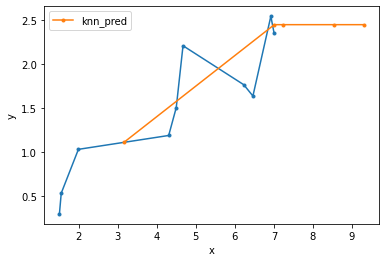

In [16]:
fig

## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()
reg = reg.fit(x[:,None], y)

In [19]:
y_pred_lr = reg.predict(x_test[:,None])

In [20]:
ax.plot(x_test, y_pred_lr, marker='.', label='lr_pred')
ax.legend()

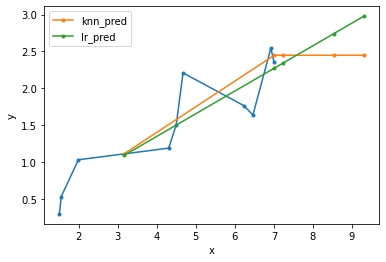

In [21]:
fig

In [22]:
print('c_pred={} - intercept={:.2f}'.format(reg.coef_, reg.intercept_))

c_pred=[0.30665852] - intercept=0.12


## How we can compare models?

Usually we use the `MSE` to evaluate how close our prediction is to the real labels.

[Sklearn provides different metrics](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#regression-metrics) for regression (and also other tasks that we don't see yet)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
y_test = x_test*c

In [25]:
'MSE LR: {} - MSE KNN: {}'.format(mean_squared_error(y_test, y_pred_lr), 
                                  mean_squared_error(y_test, y_pred_knn))

'MSE LR: 0.0293342284236539 - MSE KNN: 0.0707027502390605'

In [26]:
from sklearn.metrics import r2_score

In [27]:
'R2 LR: {} - R2 KNN: {}'.format(r2_score(y_test, y_pred_lr), 
                                r2_score(y_test, y_pred_knn))

'R2 LR: 0.9275391288270278 - R2 KNN: 0.8253513676018057'

#### what would be the R2 of a KNN with n='total number of points'

In [28]:
# model = KNeighborsRegressor(n_neighbors=len(x))
# model.fit(x[:, None], y)
# y_knn_2 = model.predict(x[:, None])

In [29]:
# 'R2 KNN: {}'.format(r2_score(y, y_knn_2))

## Exercise

In [30]:
import pandas as pd

import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('./data/tetouan_power_consumption.csv')

In [32]:
data['DateTime'].dtype

dtype('O')

In [33]:
data['DateTimeFormat'] = data['DateTime'].apply(lambda x: x.split(' ')[0])
data[['DateTime', 'DateTimeFormat']]

,DateTime,DateTimeFormat
0,1/1/2017 0:00,1/1/2017
1,1/1/2017 0:10,1/1/2017
2,1/1/2017 0:20,1/1/2017
3,1/1/2017 0:30,1/1/2017
4,1/1/2017 0:40,1/1/2017
...,...,...
52411,12/30/2017 23:10,12/30/2017
52412,12/30/2017 23:20,12/30/2017
52413,12/30/2017 23:30,12/30/2017
52414,12/30/2017 23:40,12/30/2017


In [34]:
data['DateTimeFormat'] = pd.to_datetime(data['DateTimeFormat'])
data['DateTimeFormat'].dtype

dtype('<M8[ns]')

In [35]:
selected = data[data['DateTimeFormat']>'2017-11-01']

In [36]:
selected_grouped = selected.groupby('DateTimeFormat').mean().reset_index()
selected_grouped.sample(2)

,DateTimeFormat,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
26,2017-11-28,16.711528,70.992014,4.165403,119.178368,22.796514,29775.598291,24475.309917,11602.168675
56,2017-12-28,13.662361,62.839375,0.081354,112.620160,30.209361,30267.004647,24585.251099,11167.026811


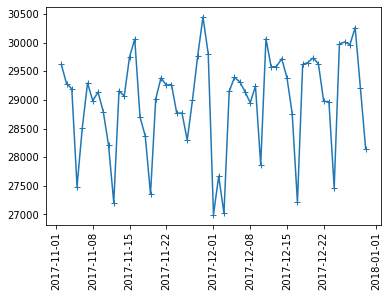

In [37]:
plt.plot(selected_grouped['DateTimeFormat'], selected_grouped['Zone 1 Power Consumption'], marker='+')
plt.xticks(rotation=90)
plt.show()

In [38]:
x_test = selected_grouped.iloc[-20:]
x_train = selected_grouped.iloc[:-20]
x_test.shape, x_train.shape

((20, 9), (39, 9))

/tmp/ipykernel_4532/1798625101.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_test['DateTimeFormat'], rotation=90)


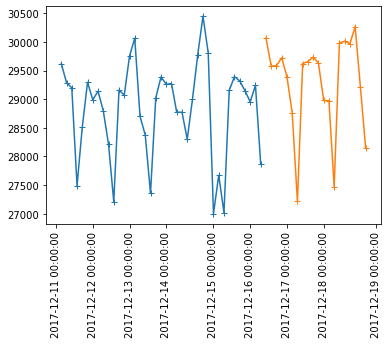

In [39]:
fig, ax = plt.subplots(1,1)
ax.plot(x_train['DateTimeFormat'], x_train['Zone 1 Power Consumption'], marker='+')
ax.plot(x_test['DateTimeFormat'], x_test['Zone 1 Power Consumption'], marker='+')
ax.set_xticklabels(x_test['DateTimeFormat'], rotation=90)
plt.show()

**Create a model that predicts the last days of the month (`x_test`)**

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
xx_train = x_train['Temperature'].values[:, None]
yy_train = x_train['Zone 1 Power Consumption'].values[:, None]

xx_test = x_test['Temperature'].values[:, None]
yy_test = x_test['Zone 1 Power Consumption'].values[:, None]

In [62]:
model = KNeighborsRegressor(n_neighbors=2)

In [63]:
model.fit(xx_train, yy_train)

KNeighborsRegressor(n_neighbors=2)

In [64]:
y_pred = model.predict(xx_test)

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
mean_squared_error(yy_test, y_pred)

1107131.5081935585

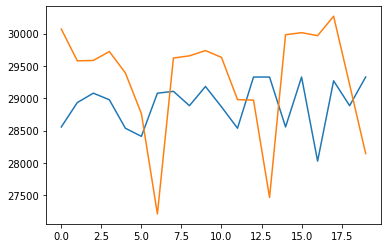

In [68]:
import matplotlib.pyplot as plt

plt.plot(y_pred)
plt.plot(yy_test)